## 데이터 전처리 (Data preprocessing)

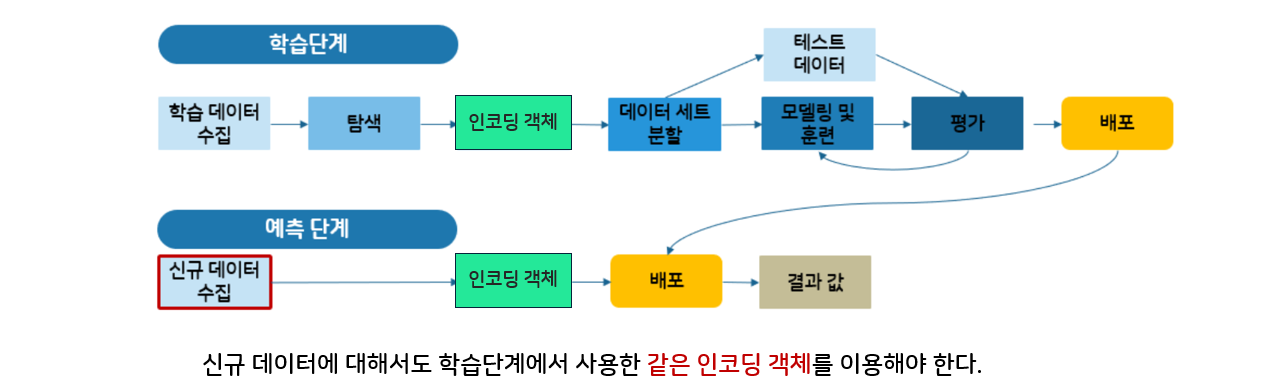

## 머신러닝/딥러닝용 데이터 상태

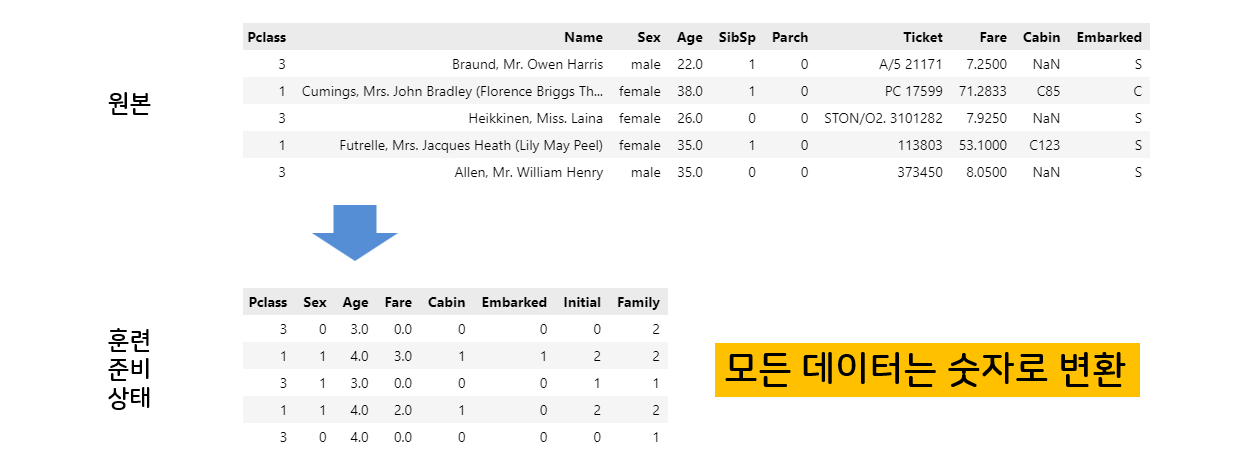

## 데이터 인코딩

* 머신러닝 알고리즘은 문자열 데이터 속성을 입력 받을 수 없습니다.
* 모든 데이터는 **```숫자형```** 으로 표현되어야 합니다.
* ```범주형 데이터```를 모두 숫자값으로 변환 /인코딩 되어야 합니다. 


### 레이블 인코딩(Label encoding)

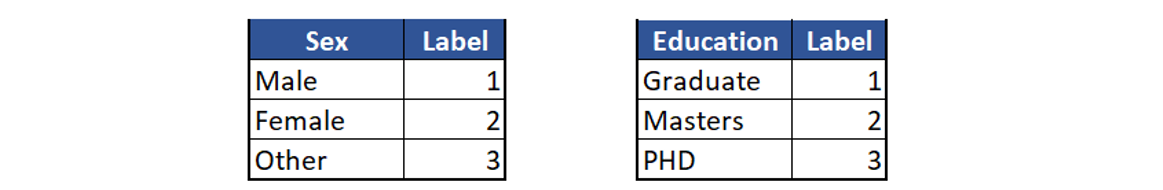

In [1]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

#훈련데이터
train=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
le = LabelEncoder()
label = le.fit_transform(train)
label

array([0, 1, 4, 5, 3, 3, 2, 2])

In [2]:
#실제 데이터
real_data = ['TV','냉장고','전자렌지','냉장고']

le.transform(real_data)


array([0, 1, 4, 1])

In [3]:
#실제 데이터
# 이렇게 하면 안됨!!!!!!!!
real_data = ['TV','냉장고','전자렌지','냉장고']
le2 = LabelEncoder() #훈련시 사용했던 인코딩 객체가 아닌 새로운 객체를 생성하면 안됨
le2.fit_transform(real_data)


array([0, 1, 2, 1])

```
[주의]
훈련시 사용했던 인코딩 객체를 그대로 사용해 변환을 해야합니다. 
-훈련 데이터-
le = LabelEncoder()
le.fit(train)

-실제 데이터-
le.fit(real) <- LabelEncoder()를 호출해서 새로운 인코딩 객체를 생성하면 안됨

```

In [4]:
import pandas as pd

train_df = pd.DataFrame({'price':[120,400,23,300,12,16,22,24],
                        'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
train_df.head()

,price,item
0,120,TV
1,400,냉장고
2,23,전자렌지
3,300,컴퓨터
4,12,선풍기


In [6]:
train_df['item'] #dtype: Series

0      TV
1     냉장고
2    전자렌지
3     컴퓨터
4     선풍기
5     선풍기
6      믹서
7      믹서
Name: item, dtype: object

In [9]:
train_df[['item']]  #type: dataframe

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [10]:
# 훈련데이터 라벨 인코딩

le = LabelEncoder()
train_df['item_label'] = train_df[['item']].apply(le.fit_transform)   
train_df

,price,item,item_label
0,120,TV,0
1,400,냉장고,1
2,23,전자렌지,4
3,300,컴퓨터,5
4,12,선풍기,3
5,16,선풍기,3
6,22,믹서,2
7,24,믹서,2


In [12]:
real_df = pd.DataFrame({'item':['TV','냉장고','전자렌지'] })
real_df

,item
0,TV
1,냉장고
2,전자렌지


In [14]:
real_df.apply(le.transform)

,item
0,0
1,1
2,4


### 원-핫 인코딩(One-Hot encoding)

* 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 피처에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식입니다. 


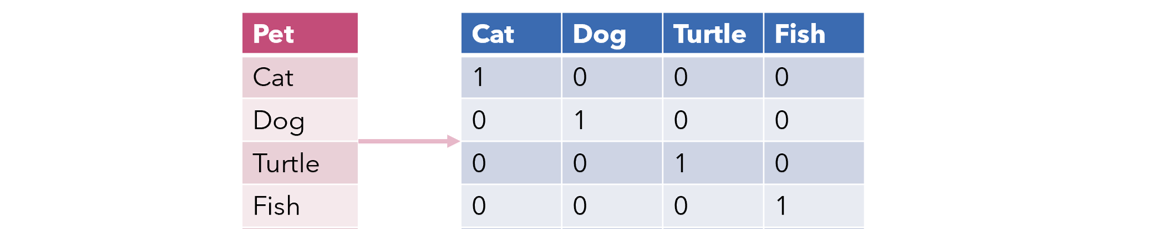

## 판다스 방법

In [ ]:
#판다스의 원-핫 인코딩이 사용이 편리하다.
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'],
                   '등급':[1,1,2,5,4,2,1,3]})
df

In [ ]:
# one-hot인코딩 적용
# 기본적으로 object type 피쳐에 대해서만 인코딩 적용


In [ ]:
onehot_cols = df.columns.tolist()
dummy = pd.get_dummies(df,columns=onehot_cols) #적용하고 싶은 컬럼 지정
dummy

## sklearn 방법

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (OneHotEncoder(), ['item']), #해당 컬럼에는 인코딩 진행
    remainder='passthrough') # 나머지는 통과 시킴

transformer.fit(df)
trans_data = transformer.transform(df)

trans_df = pd.DataFrame(data=trans_data.toarray(),columns=transformer.get_feature_names_out())
trans_df

In [ ]:
transformer.get_feature_names_out().tolist()

In [ ]:
trans_data.shape

In [ ]:
trans_data.toarray()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (OneHotEncoder(), ['item','등급']),
    remainder='passthrough')

transformer.fit(df)
trans_data = transformer.transform(df)

trans_df = pd.DataFrame(data=trans_data.toarray(),columns=transformer.get_feature_names_out())
trans_df

In [ ]:
transformer.get_feature_names_out()

In [ ]:
trans_data.shape

---

## 연습문제

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

iris = sns.load_dataset('iris')
iris.head()

```
문제1. 이 데이터에 필요한 인코딩 종류는?
```

---

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

```
문제2. 이 데이터에 필요한 인코딩 종류는?
```

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode each categorical column in the DataFrame
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])
titanic['class'] = label_encoder.fit_transform(titanic['class'])
titanic['who'] = label_encoder.fit_transform(titanic['who'])
titanic['deck'] = label_encoder.fit_transform(titanic['deck'])
titanic['embark_town'] = label_encoder.fit_transform(titanic['embark_town'])
titanic['alive'] = label_encoder.fit_transform(titanic['alive'])
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

# Display the DataFrame with encoded values
titanic.head()


```
[고려사항]
범주형 변수에 고유한 범주가 많거나 매우 기본적인(여러 범주가 많은) 경우 원-핫 인코딩을 사용하면 많은 수의 기능이 생성되어 잠재적으로 과적합될 수 있습니다. 이 경우 레이블 인코딩을 사용할 수 있습니다.
```